In [1]:
import pandas as pd
tst = pd.read_csv('test.csv')
tr = pd.read_csv('train.csv')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score , accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
tr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Classe
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Terceira
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Primeira
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Terceira
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Primeira
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Terceira


In [11]:
tr.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<Axes: xlabel='Sex', ylabel='count'>

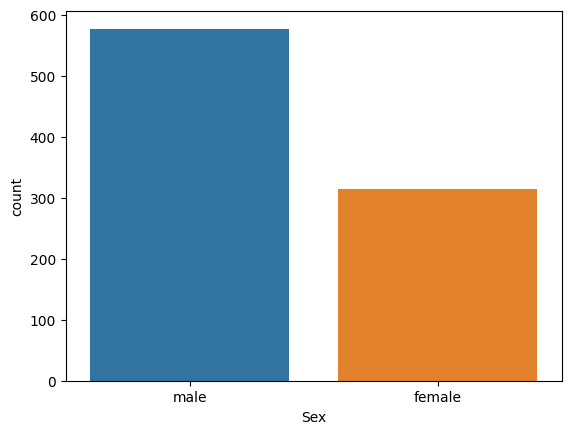

In [5]:
sns.countplot(data = tr,x='Sex')

<Axes: xlabel='Age', ylabel='Count'>

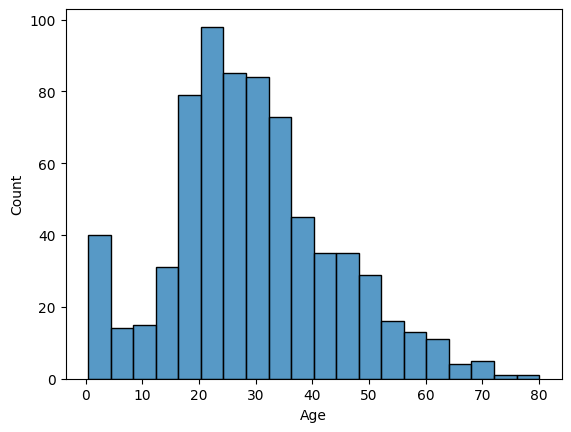

In [6]:
sns.histplot(data = tr,x='Age')

In [7]:
tr['Classe'] = ''
tr.loc[tr['Pclass']== 1,'Classe'] = 'Primeira'
tr.loc[tr['Pclass']== 2,'Classe'] = 'Segunda'
tr.loc[tr['Pclass']== 3,'Classe'] = 'Terceira'

<Axes: xlabel='Classe', ylabel='count'>

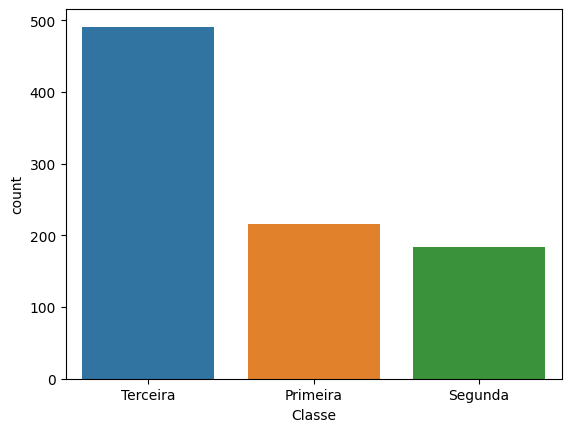

In [8]:
sns.countplot(data = tr, x = 'Classe')

<Axes: xlabel='Survived', ylabel='count'>

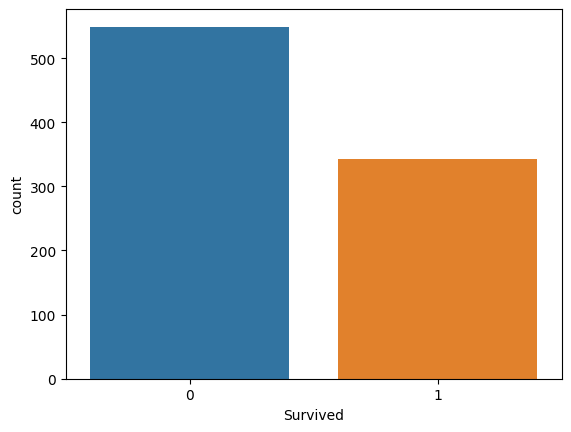

In [9]:
sns.countplot(data = tr,x='Survived')

Grafico abaixo representa a quantidade demortos e sobreviventes por idade

In [12]:
vivos = tr.loc[tr['Survived']== 1]
mortos = tr.loc[tr['Survived']== 0]

<Axes: xlabel='Age', ylabel='Count'>

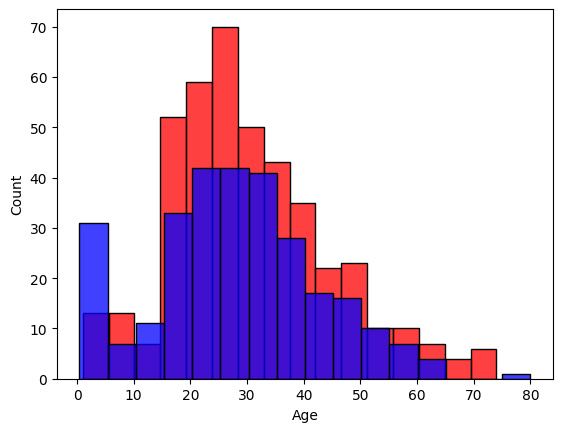

In [13]:
sns.histplot(data = mortos, x = 'Age',color='red')
sns.histplot(data = vivos, x = 'Age', color='blue')

Grafico abaixo representa quantidade de mortos e sobreviventes por sexo
onde nota-se que passageiros do sexo masculino tiveram maior indice de mortalidade

<Axes: xlabel='Sex', ylabel='Count'>

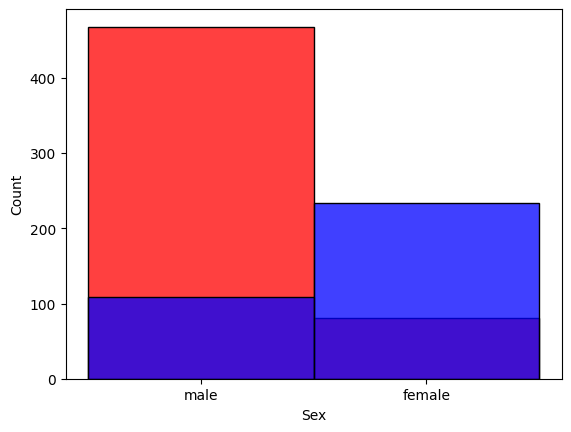

In [21]:
sns.histplot(data = mortos, x = 'Sex',color='red')
sns.histplot(data = vivos, x = 'Sex',color='blue')

Grafico de sobreviventes por classe

<Axes: xlabel='Classe', ylabel='count'>

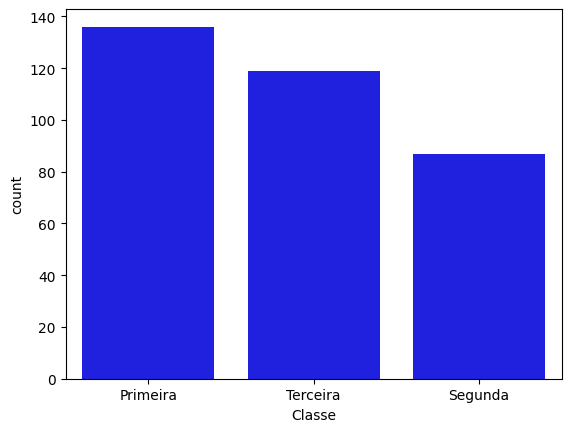

In [22]:
sns.countplot(data = vivos, x = 'Classe', color='blue')

Grafico de mortos por classe

<Axes: xlabel='Classe', ylabel='Count'>

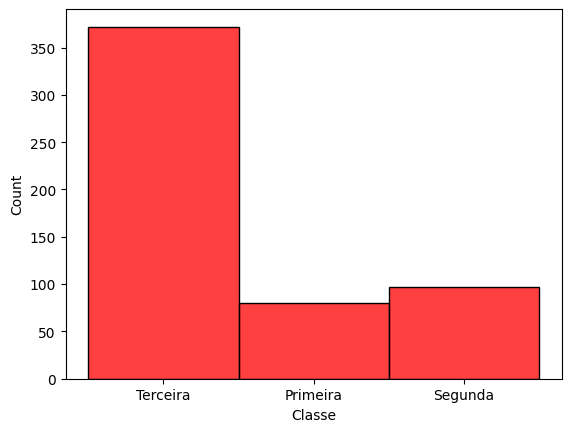

In [23]:
sns.histplot(data = mortos, x = 'Classe',color='red')


grafico abaixo mostra o numero de pessoas de acordo com local de embarque

<Axes: xlabel='Embarked', ylabel='count'>

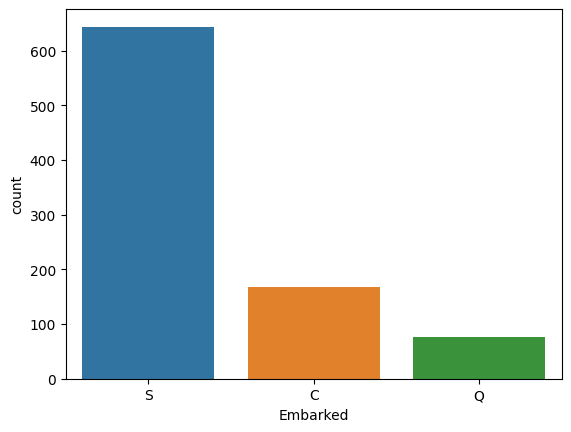

In [29]:
sns.countplot(data = tr,x= 'Embarked')

grafico abaixo mostra o numero de sobreviventes de acordo com local de embarque

<Axes: xlabel='Embarked', ylabel='Count'>

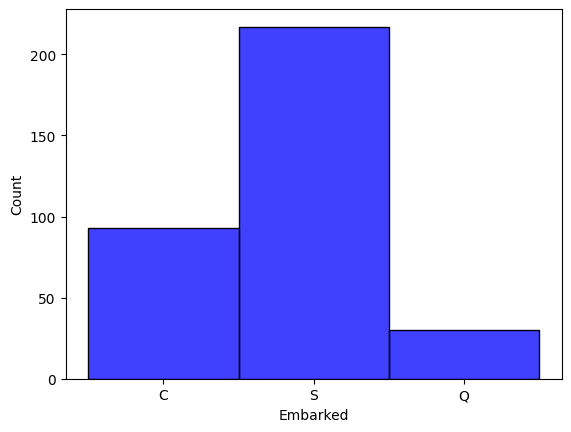

In [31]:
sns.histplot(data = vivos, x = 'Embarked',color='blue')

grafico abaixo mostra o numero de mortos de acordo com local de embarque

<Axes: xlabel='Embarked', ylabel='Count'>

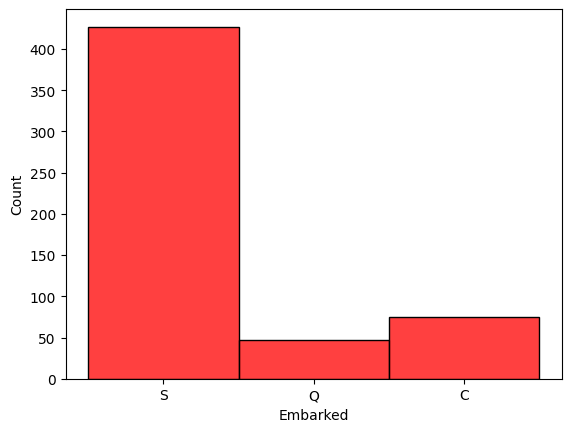

In [32]:
sns.histplot(data = mortos, x = 'Embarked',color='red')

########################################################

indice de sobreviventes e mortos por classe


sobreviventes classe 1

In [35]:
SobreviventesClasse1 = len(vivos[vivos['Classe'] == 'Primeira'])
(SobreviventesClasse1 *100 ) / len(vivos)

39.76608187134503

mortos classe1

In [38]:
MortosClasse1 = len(mortos[mortos['Classe'] == 'Primeira'])
( MortosClasse1*100 ) / len(mortos)

14.571948998178506

sobreviventes classe 2

In [37]:
SobreviventesClasse2 = len(vivos[vivos['Classe'] == 'Segunda'])
(SobreviventesClasse2 *100 ) / len(vivos)

25.43859649122807

mortos classe 2

In [39]:
MortosClasse2 = len(mortos[mortos['Classe'] == 'Segunda'])
( MortosClasse2*100 ) / len(mortos)

17.66848816029144

sobreviventes classe 3

In [41]:
SobreviventesClasse3 = len(vivos[vivos['Classe'] == 'Terceira'])
(SobreviventesClasse3 *100 ) / len(vivos)

34.7953216374269

mortos classe 3

In [42]:
MortosClasse3 = len(mortos[mortos['Classe'] == 'Terceira'])
( MortosClasse3*100 ) / len(mortos)

67.75956284153006

sobreviventes media de idade

In [43]:

vivos['Age'].mean()

28.343689655172415

mortos media de idade

In [44]:
mortos['Age'].mean()

30.62617924528302

In [45]:
tr['Fare'].std()

49.6934285971809

In [60]:

from sklearn.model_selection import train_test_split


In [62]:
eixo_X = tr[['Classe','Survived']]
eixo_y = tr['Survived']

In [63]:
amostra, __, y_train, y_test = train_test_split(
    eixo_X,
    eixo_y,
    test_size=0.7,
    stratify=tr['Classe'],
    random_state=42
)


In [64]:
amostraClasse1 = tr[tr['Classe']  == 'Primeira'].sample(n=50,random_state=42,replace=False)
amostraClasse2 = tr[tr['Classe']  == 'Segunda'].sample(n=50,random_state=42,replace=False)
amostraClasse3 = tr[tr['Classe']  == 'Terceira'].sample(n=50,random_state=42,replace=False)
representacao = pd.concat([amostraClasse1, amostraClasse2, amostraClasse3])
representacao.value_counts('Classe')
representacao = representacao.loc[representacao['Survived'] == 1]

<Axes: xlabel='Classe', ylabel='count'>

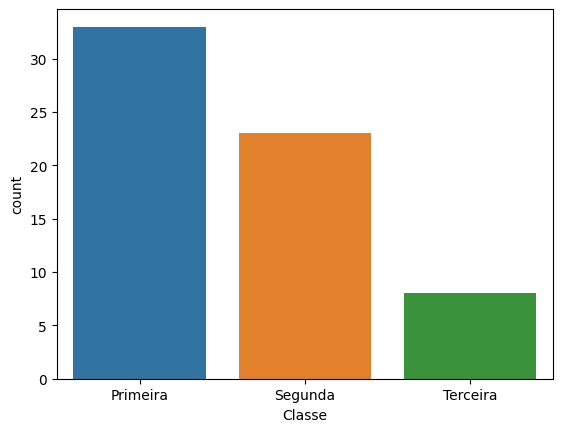

In [65]:
sns.countplot(data = representacao, x = 'Classe')

provabilidade de sobrevivencia

In [66]:
amostral = len(tr)
amostral

891

representacao de vivos do sexo masculino

In [67]:

pesquisa = vivos.loc[vivos['Sex']=='male']
evento = len(pesquisa)
evento

109

provabilidade

In [68]:

probabilidade1 = evento / amostral
probabilidade1

0.122334455667789

representacao de vivos do sexo feminino

In [69]:
pesquisa2 = vivos.loc[vivos['Sex']=='female']
evento2 = len(pesquisa2)
evento2

233

provabilidade

In [72]:
probabilidade2 = evento2 / amostral
probabilidade2

0.2615039281705948

<Axes: xlabel='Parch', ylabel='SibSp'>

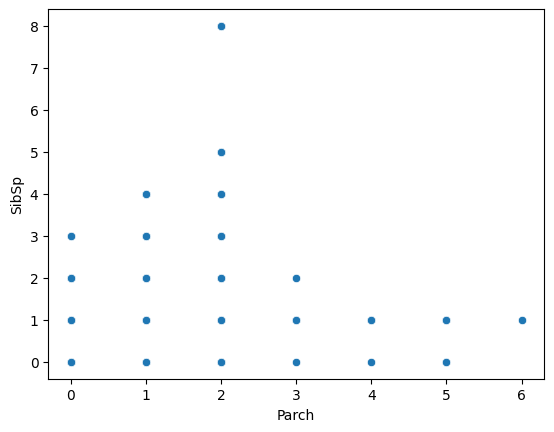

In [74]:
sns.scatterplot(tr, x='Parch', y='SibSp')

<ipython-input-76-5943540957b9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tr.corr(), annot=True).color= "grey"


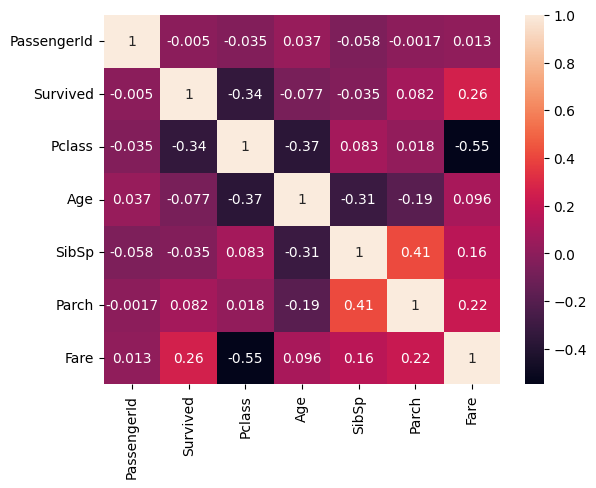

In [76]:
from seaborn.widgets import color_palette
sns.heatmap(tr.corr(), annot=True)

In [77]:
tr = tr.dropna()


X = tr.drop('Survived',axis=1)
y = tr['Survived']

X = pd.get_dummies(X)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42
)

In [79]:
result = DecisionTreeClassifier()

result.fit(X_train,y_train)

DecisionTreeClassifier()

In [80]:
y_prdiz = result.predict(X_test)


accuracy = accuracy_score(y_test,y_prdiz)
accuracy

0.7837837837837838

In [81]:
resultFinal = pd.DataFrame()

resultFinal['Passageiros'] = X_test['PassengerId']
resultFinal['Sobrevivente'] = y_prdiz

resultFinal

,Passageiros,Sobrevivente
118,119,0
251,252,1
742,743,1
544,545,0
712,713,1
96,97,0
139,140,0
337,338,1
577,578,1
492,493,1
